# Predicting Diamond Prices
### Phase 2: Statistical Modeling

### Group 106
### Dylan Hann s3719281
### Edward Pearson s3844470

## Table of Contents
- [Introduction](#intro)
- [Statistical Modeling](#stats)
- [Critique and Limitations](#crithit)
- [Summary and Conclusion](#summary)

## Phase One Summary <a id='intro'></a>
In phase one we preprocessed the data which involved checking for any missing or incorrect values and random sampling the large dataset. We then output some basic graphs looking at the trends of the diamonds with specific interest in how the different diamond specifications affected price.
It was discovered that there is a correlation between price and the diamond specifications carat and colour. The other diamond specifications were considered inconclusive to whether they have an effect on diamond price.

### Report Overview

### Overview of Methodology

## Statistical Modeling <a id='stats'></a>

### model Overview

#### Model imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [4]:
formula_string_ind_vars= '+'.join(df.drop(columns='price').columns)
formula_string='price~'+formula_string_ind_vars
print('Formula string: ', formula_string)

Formula string:  price~carat+cut+color+clarity+depth+table+x+y+z


In [5]:
df_encoded=pd.get_dummies(df, drop_first=True)
df_encoded=df_encoded.rename(columns={'cut_Very Good': 'cut_very_good'})
df_encoded.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_very_good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [6]:
formula_string_ind_vars_encoded= '+'.join(df_encoded.drop(columns='price').columns)
formula_string_encoded='price~'+formula_string_ind_vars_encoded
print('Formula string encoded: ', formula_string_encoded)

Formula string encoded:  price~carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_very_good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2


In [7]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=df_encoded)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:07:42   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2184.4774    408.197      5.352

In [15]:
residuals_full = pd.DataFrame({'actual': df_encoded['price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,326,-1346.364288,1672.364288
1,326,-664.595411,990.595411
2,327,211.107106,115.892894
3,334,-830.737177,1164.737177
4,335,-3459.224220,3794.224220
5,336,-1380.487569,1716.487569
6,336,-397.875201,733.875201
7,337,-1073.323502,1410.323502
8,337,-1040.023136,1377.023136
9,338,-420.417884,758.417884


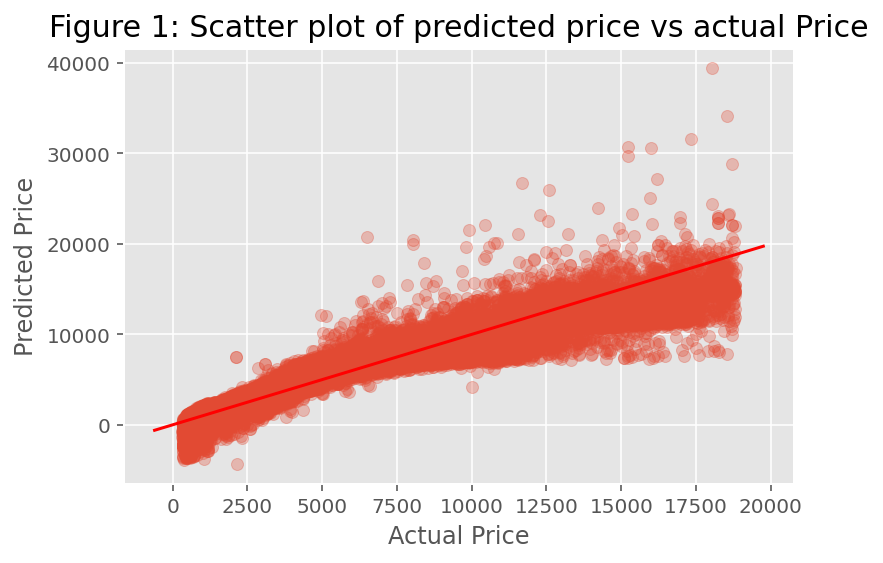

In [16]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 1: Scatter plot of predicted price vs actual Price', fontsize=15);
plt.show();

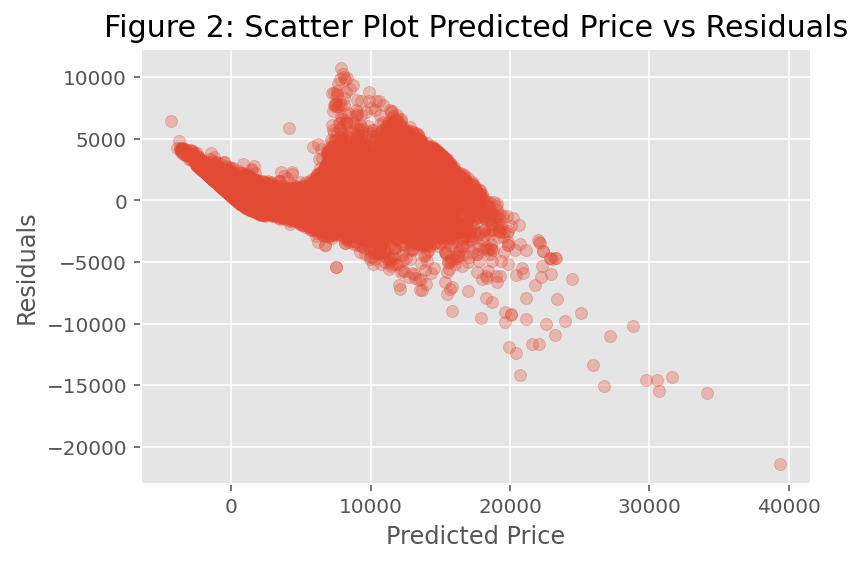

In [17]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 2: Scatter Plot Predicted Price vs Residuals', fontsize=15)
plt.show();

The residuals around the $10000 predicted price have much larger range of residuals whereas the Extremes of the prices have less of a difference in residuals.

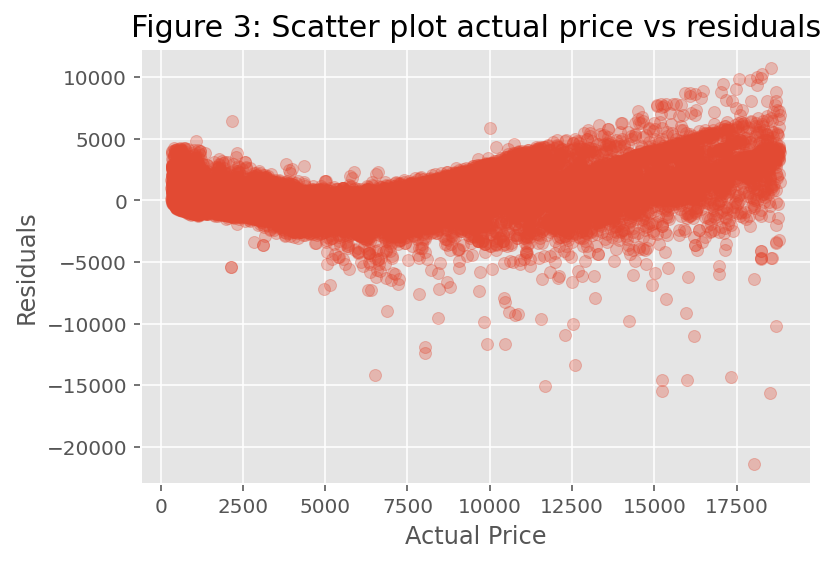

In [18]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 3: Scatter plot actual price vs residuals', fontsize=15)
plt.show();

The residuals at either end of the price spectrum are higher than the center between 5000 and 7500

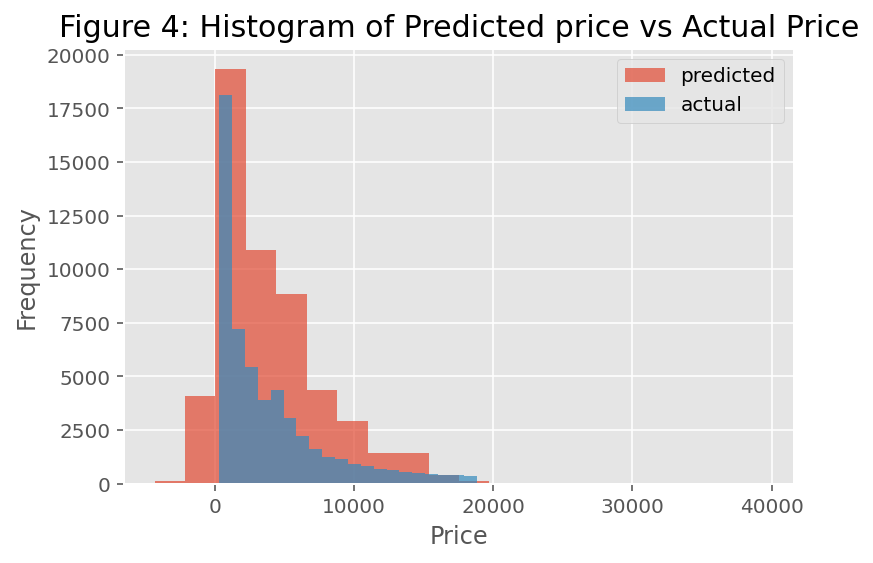

In [20]:
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of Predicted price vs Actual Price', fontsize=15);
plt.legend()
plt.show();

The actual and predicted prices follow the same trend with predicted having a much higher occurrence.

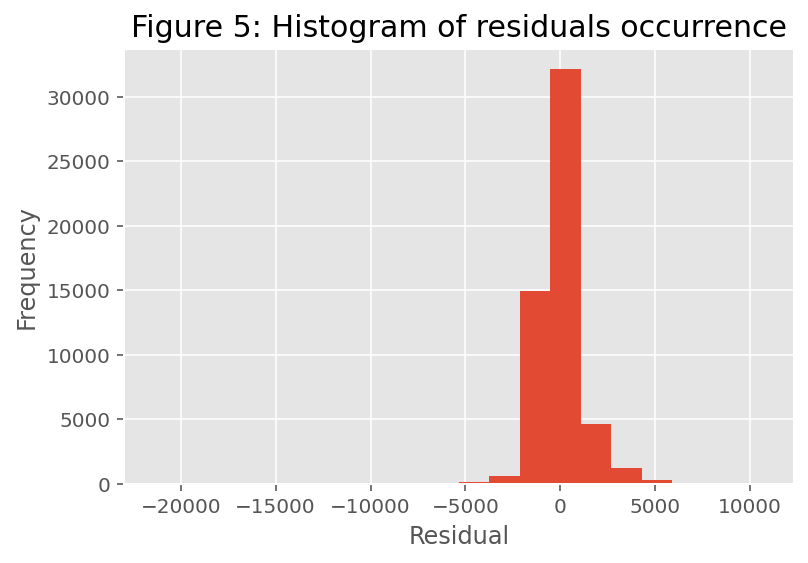

In [21]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 5: Histogram of residuals occurrence', fontsize=15);
plt.show();

The mode is slightly to the positive side of zero it is however and almost symmetrical distribution.

In [39]:
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

linreg_fit = model_full_fitted

p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')

while True:

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df_encoded).fit()
    
model_reduced_fitted = smf.ols(formula = patsy_description, data = df_encoded).fit()

print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "y" with p-value 0.6192

Removing term "z" with p-value 0.1488

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:44:45   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025  

In [40]:
residuals_reduced = pd.DataFrame({'actual': df_encoded['price'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)


,actual,predicted,residual
0,326,-1346.614726,1672.614726
1,326,-662.895014,988.895014
2,327,215.495406,111.504594
3,334,-830.942042,1164.942042
4,335,-3460.396928,3795.396928
5,336,-1382.081003,1718.081003
6,336,-398.775782,734.775782
7,337,-1073.647468,1410.647468
8,337,-1044.665285,1381.665285
9,338,-418.429847,756.429847


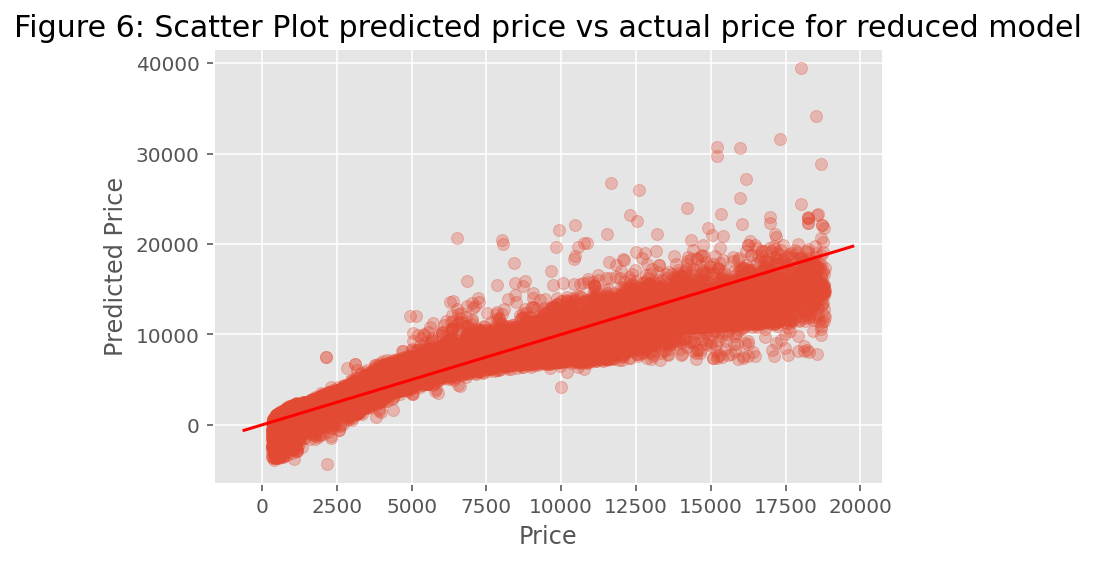

In [41]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 6: Scatter Plot predicted price vs actual price for reduced model', fontsize=15);
plt.show();

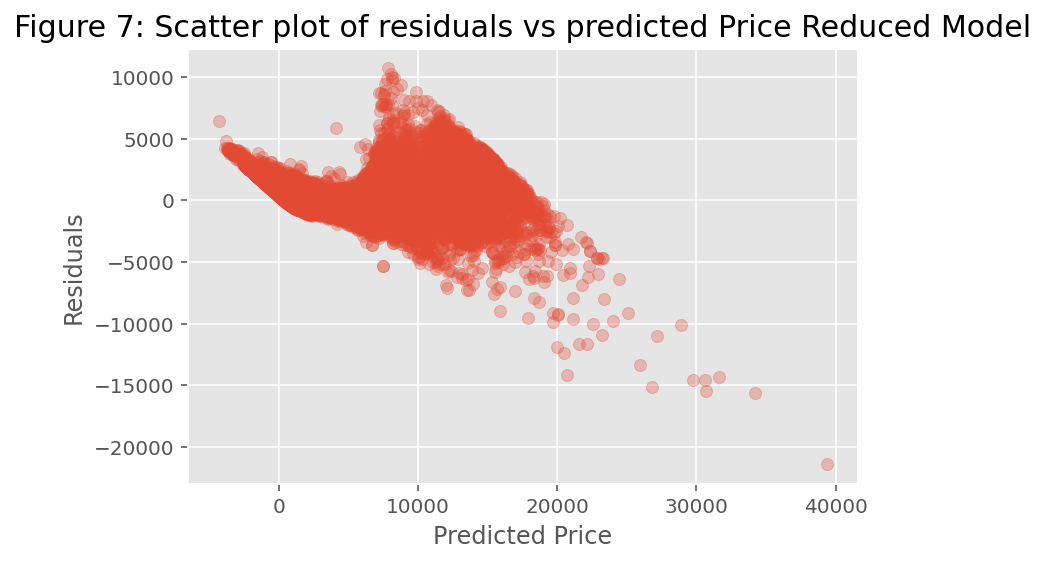

In [43]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 7: Scatter plot of residuals vs predicted Price Reduced Model', fontsize=15)
plt.show();

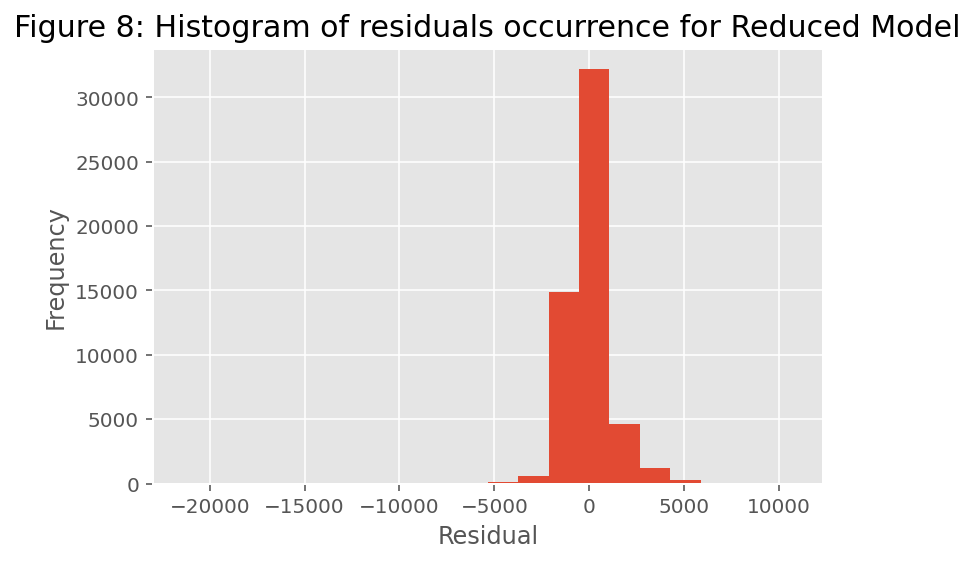

In [44]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 8: Histogram of residuals occurrence for Reduced Model', fontsize = 15)
plt.show();